# Quiz 1

The collection of speaches being analyzed for this project is 105-inouye-hi. Each speach will be split into its own document, being divided by < DOC >

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import requests
import numpy as np
import matplotlib.pyplot as plt
import time
from nltk.stem import WordNetLemmatizer
import string

vectorizer = TfidfVectorizer()

In [2]:
url = 'https://raw.githubusercontent.com/Iandrewburg/Text-Analysis/master/Inputs/105-extracted-date/105-inouye-hi.txt'

In [63]:
url_dropwords = "https://raw.githubusercontent.com/Iandrewburg/Text-Analysis/master/Inputs/droplist.txt"
response = requests.get(url_dropwords)
content = response.text

drop_words = re.findall(r'"(.*?)"', content)
drop_words.append("mr. inouye .") # append the senators name since it repeats in every speech at the beginning


In [49]:
# loading and processing the data
def load_and_preprocess_document(url):
    
    # fetch the content of the file from github
    response = requests.get(url)
    content = response.text

    # split the speaches into documents by <DOC> using regex
    speeches = re.findall('<DOC>.*?</DOC>', content, re.DOTALL)
    preprocessed_speeches = []

    # for loop to preprocess the text inside the speaches
    for speech in speeches:
        # extract text within <TEXT> tags using regex
        text = re.search('<TEXT>(.*?)</TEXT>', speech, re.DOTALL).group(1)
        # preprocess the text (lowercase, remove stopwords, tokenize)
        tokens = word_tokenize(text.lower())
        
        # Remove normal stopwords and numbers
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
        
        # Remove punctuation
        filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation and not any(char in set(string.punctuation) for char in word)]
        
        preprocessed_speeches.append(' '.join(filtered_tokens))

    return preprocessed_speeches

In [50]:
def apply_stemming(preprocessed_speeches):
    stemmer = PorterStemmer()
    stemmed_speeches = []
    for speech in preprocessed_speeches:
        tokens = speech.split()  # Assuming speech is a string of tokens
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        stemmed_speeches.append(' '.join(stemmed_tokens))
    return stemmed_speeches


In [51]:
def apply_lemmatization(preprocessed_speeches):
    lemmatizer = WordNetLemmatizer()
    lemmatized_speeches = []
    for speech in preprocessed_speeches:
        tokens = speech.split()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        lemmatized_speeches.append(' '.join(lemmatized_tokens))
    return lemmatized_speeches


In [52]:
def apply_droplist(preprocessed_speeches, droplist):
    filtered_speeches = []
    for speech in preprocessed_speeches:
        tokens = speech.split()
        filtered_tokens = [token for token in tokens if token not in droplist]
        filtered_speeches.append(' '.join(filtered_tokens))
    return filtered_speeches


In [53]:
def cosine_similarity_plot(tfidf_matrix):
    
    # Step 1: Calculating Cosine Similarity
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix).flatten()

    # Step 2: Finding the Most Similar Speech
    # Ignore the first speech itself by setting its similarity to -1
    cosine_similarities[0] = -1
    most_similar_index = np.argmax(cosine_similarities)
    most_similar_score = cosine_similarities[most_similar_index]

    print('_'*110)
    print(f"The most similar speech to the first one is at index {most_similar_index} with a cosine similarity score of {most_similar_score}.")
    print('_'*110)

    # Step 3: Analyzing Similarity Over Time
    # Plotting the similarity of each speech to the first speech over time
    plt.plot(cosine_similarities[1:], color='purple') # [1:] skips the first speech
    plt.title("Similarity of Each Speech to the First Speech Over Time")
    plt.xlabel("Speech Index")
    plt.ylabel("Cosine Similarity Score")
    plt.show()
    

## Without Lem/Stem or Droplist

______________________________________________________________________________________________________________
The most similar speech to the first one is at index 147 with a cosine similarity score of 0.23382798043415487.
______________________________________________________________________________________________________________


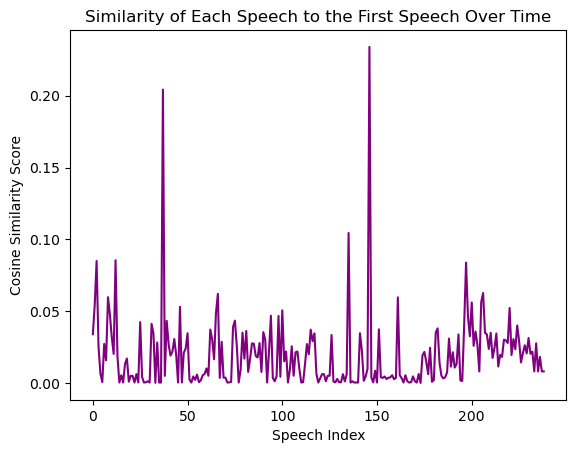

In [54]:
# loading in the speaches
preprocessed_speeches = load_and_preprocess_document(url)

# text vectorization
tfidf_matrix = vectorizer.fit_transform(preprocessed_speeches)

# cosine similarity function
cosine_similarity_plot(tfidf_matrix)

In [55]:
preprocessed_speeches[0]

'inouye president rise today support coast guard authorization act since coast guard predecessor services done truly outstanding job protecting america coasts maritime interests today coast guard recognized premier maritime service world model efficiency within federal government despite drastic reductions resources personnel last several years result government downsizing shrinking budgets coast guard admirably maintained high level service coast guard met challenges growing number missions continuously improving performance existing mission areas law enforcement maritime safety marine environmental protection national security personal strength lowest level since smallest fleet aircraft seagoing cutters since men women coast guard continue provide outstanding service nation since number fisheries boarding conducted coast guard personnel increased since number undocumented migrants interdicted coast guard grown last year arrests cocaine traffickers cocaine seizures triple previous yea

In [56]:
preprocessed_speeches[147]

'inouye president may first thank distinguished friend alaska generous remarks president rise day offer complete support fiscal year dod appropriations bill noted chairman committee bill well within budget agreement billion amount authorized last week senate programs point colleagues chairman hopeful reconsider items debated voted upon last week let assure colleagues intend modify bill conform many changes approved senate last week look forward working members staffs next hours ensure views heard president pleased report colleagues good bill product truly bipartisan process chairman pointed bill received unanimous support members appropriations committee us privilege great honor serving body many years know almost impossible get unanimous support members appropriations committee therefore wish commend chairman stevens capable staff putting bill together tough bill president fair bill protects interests nation individual members body clear top priority bill supporting troops men women w

## Without Lem/Stem or Droplist

______________________________________________________________________________________________________________
The most similar speech to the first one is at index 147 with a cosine similarity score of 0.23382798043415487.
______________________________________________________________________________________________________________


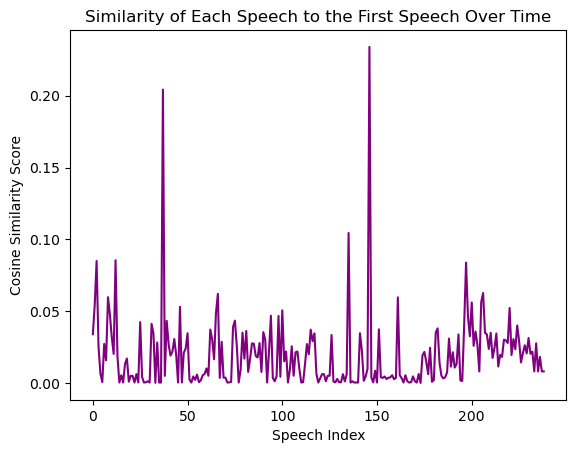

In [57]:
droplist_preprocessed_speaches = apply_droplist(preprocessed_speeches, drop_words)
tfidf_matrix_drop = vectorizer.fit_transform(preprocessed_speeches)
cosine_similarity_plot(tfidf_matrix_drop)

In [58]:
droplist_preprocessed_speaches[0]

'president rise support coast guard authorization act coast guard predecessor services truly outstanding job protecting america coasts maritime coast guard recognized premier maritime service world model efficiency federal government despite drastic reductions resources personnel result government downsizing shrinking budgets coast guard admirably maintained level service coast guard met challenges growing missions continuously improving performance existing mission law enforcement maritime safety marine environmental protection national security personal strength lowest level fleet aircraft seagoing cutters women coast guard continue provide outstanding service nation fisheries boarding conducted coast guard personnel increased undocumented migrants interdicted coast guard grown arrests cocaine traffickers cocaine seizures triple previous incredible interdiction efforts coast guard kept million cocaine hits million marijuana joints american streets estimated street value seizures bill

## With Stemming, no droplist

______________________________________________________________________________________________________________
The most similar speech to the first one is at index 147 with a cosine similarity score of 0.2647693659813699.
______________________________________________________________________________________________________________


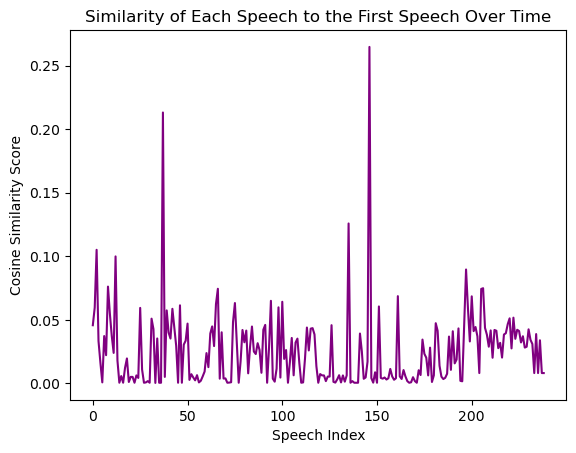

In [59]:
stemmed_speeches = apply_stemming(preprocessed_speeches)
tfidf_matrix_stem = vectorizer.fit_transform(stemmed_speeches)
cosine_similarity_plot(tfidf_matrix_stem)

## With Stemming and Droplist

______________________________________________________________________________________________________________
The most similar speech to the first one is at index 147 with a cosine similarity score of 0.27863988712146204.
______________________________________________________________________________________________________________


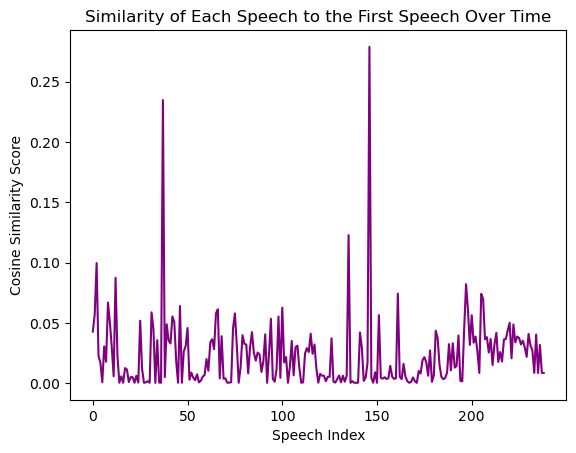

In [60]:
stemmed_speeches = apply_stemming(preprocessed_speeches)
droplist_stemmed_speeches = apply_droplist(stemmed_speeches, drop_words)
tfidf_matrix_drop_stem = vectorizer.fit_transform(droplist_stemmed_speeches)
cosine_similarity_plot(tfidf_matrix_drop_stem)

## With Lemmatizing, no droplist

______________________________________________________________________________________________________________
The most similar speech to the first one is at index 147 with a cosine similarity score of 0.24285676988982344.
______________________________________________________________________________________________________________


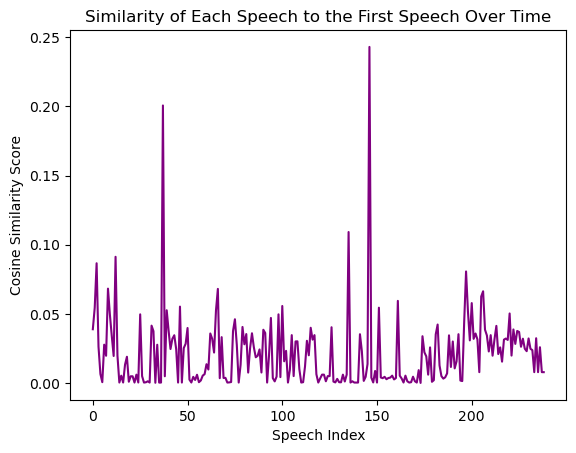

In [61]:
lemmatized_speeches = apply_lemmatization(preprocessed_speeches)
tfidf_matrix_lem = vectorizer.fit_transform(lemmatized_speeches)
cosine_similarity_plot(tfidf_matrix_lem)

## With Lemmatizing and droplist

______________________________________________________________________________________________________________
The most similar speech to the first one is at index 147 with a cosine similarity score of 0.2513365914969701.
______________________________________________________________________________________________________________


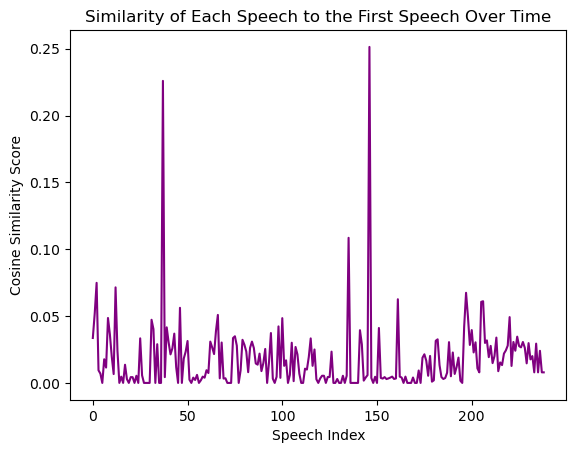

In [62]:
lemmatized_speeches = apply_lemmatization(preprocessed_speeches)
droplist_lem_speeches = apply_droplist(lemmatized_speeches, drop_words)
tfidf_matrix_drop_lem = vectorizer.fit_transform(droplist_lem_speeches)
cosine_similarity_plot(tfidf_matrix_drop_lem)